<a href="https://colab.research.google.com/github/davialvesguerra/trainee-iee/blob/main/1%C2%BA_Per%C3%ADodo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
data = pd.read_csv('gdrive/My Drive/iee/1º Período/vb_matches.csv')

In [3]:
(data.columns)

Index(['circuit', 'tournament', 'country', 'year', 'date', 'gender',
       'match_num', 'w_player1', 'w_p1_birthdate', 'w_p1_age', 'w_p1_hgt',
       'w_p1_country', 'w_player2', 'w_p2_birthdate', 'w_p2_age', 'w_p2_hgt',
       'w_p2_country', 'w_rank', 'l_player1', 'l_p1_birthdate', 'l_p1_age',
       'l_p1_hgt', 'l_p1_country', 'l_player2', 'l_p2_birthdate', 'l_p2_age',
       'l_p2_hgt', 'l_p2_country', 'l_rank', 'score', 'duration', 'bracket',
       'round', 'w_p1_tot_attacks', 'w_p1_tot_kills', 'w_p1_tot_errors',
       'w_p1_tot_hitpct', 'w_p1_tot_aces', 'w_p1_tot_serve_errors',
       'w_p1_tot_blocks', 'w_p1_tot_digs', 'w_p2_tot_attacks',
       'w_p2_tot_kills', 'w_p2_tot_errors', 'w_p2_tot_hitpct', 'w_p2_tot_aces',
       'w_p2_tot_serve_errors', 'w_p2_tot_blocks', 'w_p2_tot_digs',
       'l_p1_tot_attacks', 'l_p1_tot_kills', 'l_p1_tot_errors',
       'l_p1_tot_hitpct', 'l_p1_tot_aces', 'l_p1_tot_serve_errors',
       'l_p1_tot_blocks', 'l_p1_tot_digs', 'l_p2_tot_attacks',


# Visualização de dados: MatPlotlib & Seaborn

## Número de partidas sediadas por cada federação

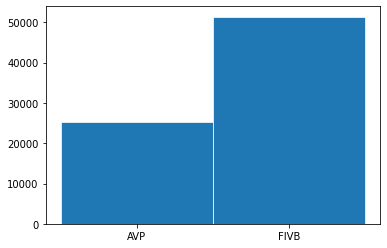

In [4]:
x = list(set(data.circuit))
y = data.groupby('circuit').apply(len)

fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

plt.show()

## Boxplot das alturas dos jogadores que ganharam

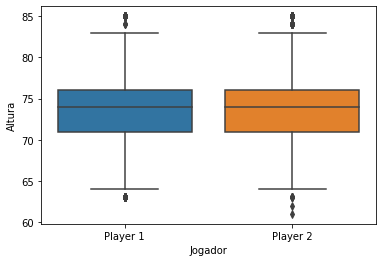

In [ ]:
data_height = data.loc[:,['w_p1_hgt','w_p2_hgt']]
data_height['id'] = data_height.index
data_height

data_height = data_height.melt(id_vars= 'id', var_name = 'Jogador', value_name = 'Altura')

data_height['Jogador'] = data_height['Jogador'].apply(lambda x: "Player 1" if x == 'w_p1_hgt' else "Player 2")

ax = sns.boxplot(x="Jogador", y="Altura",  data=data_height)

plt.show()

## Relação entre a idade do jogador 1 com a do jogador 2

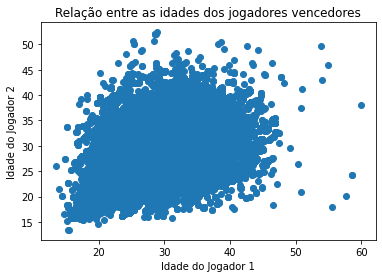

In [ ]:
age_p1 = data.w_p1_age
age_p2 = data.w_p2_age

_ = plt.scatter(age_p1, age_p2)
_ = plt.xlabel('Idade do Jogador 1')
_ = plt.ylabel('Idade do Jogador 2')
_ = plt.title('Relação entre as idades dos jogadores vencedores')

plt.show()

# Manipulação de dados: NumPy e Pandas


## Países que mais perderam 


In [ ]:
data

,circuit,tournament,country,year,date,gender,match_num,w_player1,w_p1_birthdate,w_p1_age,w_p1_hgt,w_p1_country,w_player2,w_p2_birthdate,w_p2_age,w_p2_hgt,w_p2_country,w_rank,l_player1,l_p1_birthdate,l_p1_age,l_p1_hgt,l_p1_country,l_player2,l_p2_birthdate,l_p2_age,l_p2_hgt,l_p2_country,l_rank,score,duration,bracket,round,w_p1_tot_attacks,w_p1_tot_kills,w_p1_tot_errors,w_p1_tot_hitpct,w_p1_tot_aces,w_p1_tot_serve_errors,w_p1_tot_blocks,w_p1_tot_digs,w_p2_tot_attacks,w_p2_tot_kills,w_p2_tot_errors,w_p2_tot_hitpct,w_p2_tot_aces,w_p2_tot_serve_errors,w_p2_tot_blocks,w_p2_tot_digs,l_p1_tot_attacks,l_p1_tot_kills,l_p1_tot_errors,l_p1_tot_hitpct,l_p1_tot_aces,l_p1_tot_serve_errors,l_p1_tot_blocks,l_p1_tot_digs,l_p2_tot_attacks,l_p2_tot_kills,l_p2_tot_errors,l_p2_tot_hitpct,l_p2_tot_aces,l_p2_tot_serve_errors,l_p2_tot_blocks,l_p2_tot_digs
0,AVP,Huntington Beach,United States,2002,2002-05-24,M,1,Kevin Wong,1972-09-12,29.694730,79.0,United States,Stein Metzger,1972-11-17,29.514032,75.0,United States,1,Chuck Moore,1973-08-18,28.763860,76.0,United States,Ed Ratledge,1976-12-16,25.434634,80.0,United States,32,"21-18, 21-12",00:33:00,Winner's Bracket,Round 1,NaN,NaN,NaN,NaN,1.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN
1,AVP,Huntington Beach,United States,2002,2002-05-24,M,2,Brad Torsone,1975-01-14,27.356605,78.0,United States,Casey Jennings,1975-07-10,26.872006,75.0,United States,16,Mark Paaluhi,1971-03-08,31.211499,75.0,United States,Nick Hannemann,1972-01-12,30.362765,78.0,United States,17,"21-16, 17-21, 15-10",00:57:00,Winner's Bracket,Round 1,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,AVP,Huntington Beach,United States,2002,2002-05-24,M,3,Eduardo Bacil,1971-03-11,31.203285,74.0,Brazil,Fred Souza,1972-05-13,30.028747,79.0,Brazil,24,Adam Jewell,1975-06-24,26.915811,77.0,United States,Collin Smith,1975-05-26,26.995209,76.0,United States,9,"21-18, 21-18",00:46:00,Winner's Bracket,Round 1,NaN,NaN,NaN,NaN,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,AVP,Huntington Beach,United States,2002,2002-05-24,M,4,Brent Doble,1970-01-03,32.386037,78.0,United States,Karch Kiraly,2060-11-03,41.552361,74.0,United States,8,David Swatik,1973-02-14,29.270363,76.0,United States,Mike Mattarocci,1969-10-05,32.632444,80.0,United States,25,"21-16, 21-15",00:44:00,Winner's Bracket,Round 1,NaN,NaN,NaN,NaN,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,0.0,NaN
4,AVP,Huntington Beach,United States,2002,2002-05-24,M,5,Albert Hannemann,1970-05-04,32.054757,75.0,United States,Jeff Nygaard,1972-08-03,29.804244,80.0,United States,5,Adam Roberts,1976-01-25,26.327173,73.0,United States,Jim Walls,1978-03-26,24.161533,75.0,United States,28,"20-22, 23-21, 15-10",01:08:00,Winner's Bracket,Round 1,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76751,FIVB,Oslo,Norway,2019,2019-08-28,M,24,Christian Sorum,1995-12-03,23.734428,76.0,Norway,Markus Mol,2002-04-03,17.401780,76.0,Norway,2,Jacob Brinck,1999-02-24,20.506502,76.0,Denmark,Mads Rosager,1991-03-15,28.454483,NaN,Denmark,5,"21-17, 21-16",00:34:00,Winner's Bracket,Round 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76752,FIVB,Oslo,Norway,2019,2019-08-28,M,25,Anders Mol,1997-07-02,22.154689,73.0,Norway,Nils Ringoen,2001-02-26,18.499658,76.0,Norway,1,Daniel Bergerud,1991-12-14,27.704312,79.0,Norway,Lars Retterholt,1991-01-08,28.635181,74.

## Analisando as idades dos jogadores que ganharam partidas

In [ ]:
yearBornP1 = data["w_p1_birthdate"].apply(lambda x: int(x[:4]) if type(x) == str else x)
yearBornP2 = data["w_p2_birthdate"].apply(lambda x: int(x[:4]) if type(x) == str else x)

ageP1 = 2021 - yearBornP1
ageP2 = 2021 - yearBornP2

diifAgePlayersWin = pd.Series(ageP1 - ageP2)

print("Descrição das Idades dos Jogadores 1 que venceram \n")
print(yearBornP1.describe())
print("\nDescrição das Idades dos Jogadores 2 que venceram \n")
print(yearBornP2.describe())
print("\nDescrição da diferença das idades entre os jogadores vencedores \n")
print(diifAgePlayersWin.describe())

Descrição das Idades dos Jogadores 1 que venceram 

count    76373.000000
mean      1984.818182
std         16.434021
min       1958.000000
25%       1976.000000
50%       1982.000000
75%       1988.000000
max       2068.000000
Name: w_p1_birthdate, dtype: float64

Descrição das Idades dos Jogadores 2 que venceram 

count    76348.000000
mean      1983.957956
std         14.770449
min       1968.000000
25%       1976.000000
50%       1982.000000
75%       1988.000000
max       2068.000000
Name: w_p2_birthdate, dtype: float64

Descrição da diferença das idades entre os jogadores vencedores 

count    76032.000000
mean        -0.883510
std         19.069845
min        -99.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max         99.000000
dtype: float64


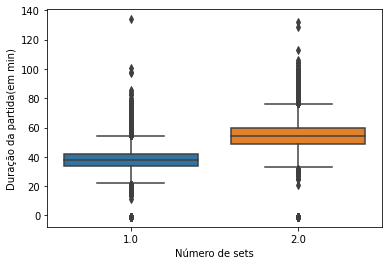

In [ ]:
numSets = data['score'].apply(lambda x: x.count(',') if type(x) == str else x)
durationMatch = data['duration'].apply(lambda x: [int(x[:2]), int(x[3:5])] if type(x) == str else x)

minMatch = [x[0]*60 + x[1] if type(x) != float else -1 for x in durationMatch ]

set_min = np.array([numSets, minMatch])
set_min = np.transpose(set_min)

durationGame = pd.DataFrame(set_min, columns=['numSets', 'minSets'])

#print(durationGame.shape)

durationGame = durationGame.dropna()
durationGame = durationGame[durationGame['numSets'] != 0.0]

ax = sns.boxplot(x="numSets", y="minSets",  data=durationGame)
ax.set_title("")
ax.set_ylabel('Duração da partida(em min)')
ax.set_xlabel('Número de sets')

plt.show()